In [1]:
# load data
from sklearn import datasets
boston = datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


/Users/Hanna/opt/anaconda3/envs/myenv_python3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include t

In [2]:
# summary of data
feature = boston.data
price = boston.target
print('data size = ', feature.shape)
print('target size = ', price.shape)
print('feature attributes: ', boston.feature_names)
print(boston.DESCR)

data size =  (506, 13)
target size =  (506,)
feature attributes:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employme

In [3]:
# more details of data
import pandas as pd
df_feature = pd.DataFrame(feature, columns = boston.feature_names)
df_target = pd.DataFrame(price, columns =['MEDV'])
df_boston = pd.concat([df_feature, df_target,], axis = 1)

In [4]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Figure size 432x288 with 0 Axes>

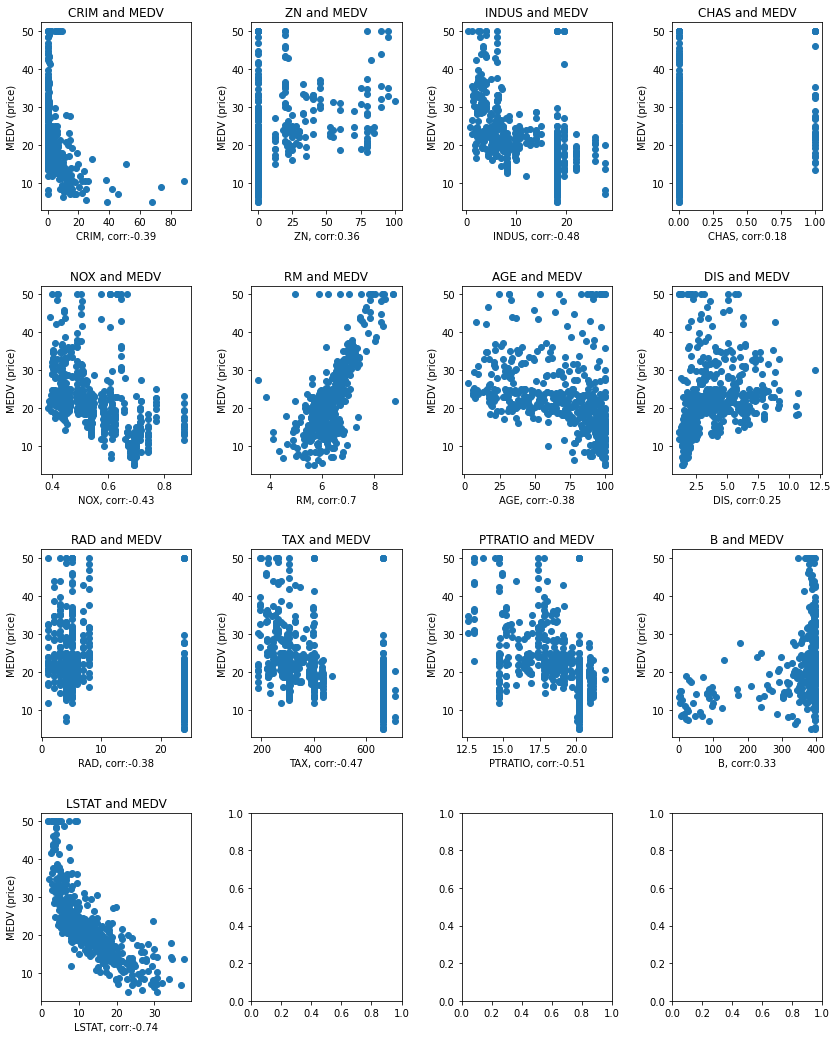

[Prob 3(a)]
  Top 3 features: LSTAT, RM, PTRATIO


In [6]:
# 2.1 how does each feature relate to the price
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
fig,axes = plt.subplots(4, 4, figsize=(14,18))
fig.subplots_adjust(wspace=.4, hspace=.4)
img_index = 0
for i in range(boston.feature_names.size):
    row, col = i // 4, i % 4
    axes[row][col].scatter(feature[:,i], price)
    axes[row][col].set_title(boston.feature_names[i] + ' and MEDV')
    #axes[row][col].set_xlabel(boston.feature_names[i])
    corr = round(np.corrcoef(feature[:,i],price)[0][1],2)
    axes[row][col].set_xlabel("{}, corr:{}".format(boston.feature_names[i], corr))
    axes[row][col].set_ylabel('MEDV (price)')
plt.show()

print("[Prob 3(a)]")
print("  Top 3 features: LSTAT, RM, PTRATIO")

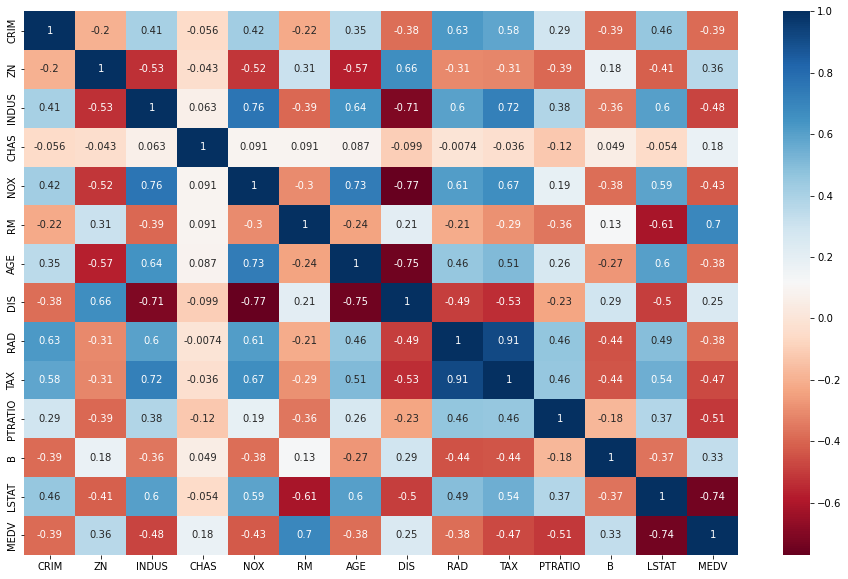

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [7]:
# 2.2 correlation matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(16, 10))
correlation = df_boston.corr()
sns.heatmap(correlation, annot = True, cmap = 'RdBu')
plt.show()
correlation

In [8]:
print("[Prob 3(b)]")
print("  Top 3 features: LSTAT, RM, PTRATIO")
print("  Yes, they are same as the ones in problem 3(a)")

[Prob 3(b)]
  Top 3 features: LSTAT, RM, PTRATIO
  Yes, they are same as the ones in problem 3(a)


In [9]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.3, random_state=8)

In [10]:
# 2.3 linear regression and ridge regression
import numpy as np
def least_square(X, y):
    #Theta = (Xt*X)_inv * Xt * y
    Xt = np.transpose(X)
    theta = np.matmul( np.matmul( np.linalg.inv(np.matmul(Xt,X)), Xt), y)
    return theta

def ridge_reg(X, y, eta):
    #Theta = (Xt*X + eta*I)_inv * Xt * y
    Xt = np.transpose(X)
    eta_I = eta*np.identity(np.matmul(Xt,X).shape[0])
    theta = np.matmul( np.matmul( np.linalg.inv( np.matmul(Xt,X)+eta_I ), Xt), y)
    
    return theta

print("[Prob 3(c)]")
# apply linear regression
print("-- Closed-form solver of linear regression")
theta = least_square(X_train, y_train)
df_theta = pd.DataFrame(zip(boston.feature_names, theta),columns=['Feature','Coeff'])
print(df_theta)

# apply ridge regression
print("\n\n--Closed-form solver of ridge regression")
theta_r = ridge_reg(X_train, y_train, 15.0)
df_theta_r = pd.DataFrame(zip(boston.feature_names, theta_r),columns=['Feature','Coeff'])
print(df_theta_r)

[Prob 3(c)]
-- Closed-form solver of linear regression
    Feature     Coeff
0      CRIM -0.099324
1        ZN  0.052251
2     INDUS  0.004516
3      CHAS  2.957261
4       NOX  1.127938
5        RM  5.854198
6       AGE -0.014957
7       DIS -0.920844
8       RAD  0.159519
9       TAX -0.008934
10  PTRATIO -0.435674
11        B  0.014905
12    LSTAT -0.474751


--Closed-form solver of ridge regression
    Feature     Coeff
0      CRIM -0.101157
1        ZN  0.056906
2     INDUS  0.016161
3      CHAS  1.854801
4       NOX  0.380824
5        RM  5.574767
6       AGE -0.006243
7       DIS -0.869514
8       RAD  0.164159
9       TAX -0.008988
10  PTRATIO -0.375560
11        B  0.015989
12    LSTAT -0.495622


In [11]:
# 2.4 evaluation
def pred_fn(X, theta):
    # pred = Sigma(Wi*Xi)
    pred = np.matmul(X, theta.Coeff)
    return pred

def root_mean_square_error(pred, y):
    #  sqrt ( 1/n * Sigma((y-predi)^2) )
    rmse = np.sqrt((1/y.shape[0]) * np.matmul(y-pred, np.transpose(y-pred)))
    return rmse

print("[Prob 3(d)]")
# apply linear regression
print("-- RMSE of Linear regression")
pred_train = pred_fn(X_train, df_theta)
rmse_train = root_mean_square_error(pred_train, y_train)
print("   - Training RMSE: ", rmse_train)
pred_test = pred_fn(X_test, df_theta)
rmse_test = root_mean_square_error(pred_test, y_test)
print("   - Test RMSE: ", rmse_test)

# apply ridge regression
print("\n--RMSE of Ridge regression")
pred_r_train = pred_fn(X_train, df_theta_r)
rmse_r_train = root_mean_square_error(pred_r_train, y_train)
print("   - Training RMSE: ", rmse_r_train)
pred_r_test = pred_fn(X_test, df_theta_r)
rmse_r_test = root_mean_square_error(pred_r_test, y_test)
print("   - Test RMSE: ", rmse_r_test)

#Q&A
print("\nQ) Comparing training RMSE of linear regression and ridge regression")
print(" --> Training RMSE of Linear Regression is lower because Ridge regression's hypethesis is generalized. Training in Linear Regressino is overfit")
print("Q) Comparing test RMSE of linear regression and ridge regression")
print(" --> Test RMSE of Ridge Regression is lower because Ridge regression's hypethesis is generalized reducing overfitting")
print("Q) Can you explain the difference")
print(" --> Ridge Regression fights for overfitting by reducing the effect of weights and high variance")


[Prob 3(d)]
-- RMSE of Linear regression
   - Training RMSE:  4.820626531838222
   - Test RMSE:  5.209217510530829

--RMSE of Ridge regression
   - Training RMSE:  4.837923187275837
   - Test RMSE:  5.1878469459481025

Q) Comparing training RMSE of linear regression and ridge regression
 --> Training RMSE of Linear Regression is lower because Ridge regression's hypethesis is generalized. Training in Linear Regressino is overfit
Q) Comparing test RMSE of linear regression and ridge regression
 --> Test RMSE of Ridge Regression is lower because Ridge regression's hypethesis is generalized reducing overfitting
Q) Can you explain the difference
 --> Ridge Regression fights for overfitting by reducing the effect of weights and high variance


In [12]:
# 2.5 linear models of top-3 features

# Top 3 features: LSTAT, RM, PTRATIO
df_feature_top3 = df_feature[['LSTAT', 'RM', 'PTRATIO']]
feature_top3 = df_feature_top3.to_numpy()

#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(feature_top3, price, test_size=0.3, random_state=8)

print("[Prob 3(e)]")
# -- Closed-form solver of linear regression
theta = least_square(X_train, y_train)
df_theta = pd.DataFrame(zip(['LSTAT', 'RM', 'PTRATIO'], theta),columns=['Feature','Coeff'])
print(" Top3 Coeff for Linear regression: ")
print(df_theta)
theta_r = ridge_reg(X_train, y_train, 15.0)
df_theta_r = pd.DataFrame(zip(['LSTAT', 'RM', 'PTRATIO'], theta_r),columns=['Feature','Coeff'])
print("\n Top3 Coeff for Ridge regression: ")
print(df_theta_r)

# linear regression using top-3 features
print("\n\n-- RMSE of Linear regression with Top3 features")
pred_train = pred_fn(X_train, df_theta)
rmse_train = root_mean_square_error(pred_train, y_train)
print("   - Training RMSE: ", rmse_train)
pred_test = pred_fn(X_test, df_theta)
rmse_test = root_mean_square_error(pred_test, y_test)
print("   - Test RMSE: ", rmse_test)

# ridge regression using top-3 features
print("\n--RMSE of Ridge regression with Top3 feataures")
pred_r_train = pred_fn(X_train, df_theta_r)
rmse_r_train = root_mean_square_error(pred_r_train, y_train)
print("   - Training RMSE: ", rmse_r_train)
pred_r_test = pred_fn(X_test, df_theta_r)
rmse_r_test = root_mean_square_error(pred_r_test, y_test)
print("   - Test RMSE: ", rmse_r_test)

print("\nQ) Comparing 13 features vs Top3 faetures")
print(" --> RMSE is slightly different. 13 features has lower error rate but not much difference")
print(" --> More feature might increase accuracy lightly but when computation is costly it would be better to select highly correlated features")


[Prob 3(e)]
 Top3 Coeff for Linear regression: 
   Feature     Coeff
0    LSTAT -0.536277
1       RM  6.405904
2  PTRATIO -0.595916

 Top3 Coeff for Ridge regression: 
   Feature     Coeff
0    LSTAT -0.554668
1       RM  6.151543
2  PTRATIO -0.498355


-- RMSE of Linear regression with Top3 features
   - Training RMSE:  5.273361751695365
   - Test RMSE:  5.494723646664566

--RMSE of Ridge regression with Top3 feataures
   - Training RMSE:  5.279798619574378
   - Test RMSE:  5.4717121235404225

Q) Comparing 13 features vs Top3 faetures
 --> RMSE is slightly different. 13 features has lower error rate but not much difference
 --> More feature might increase accuracy lightly but when computation is costly it would be better to select highly correlated features


[Prob 3(f)]


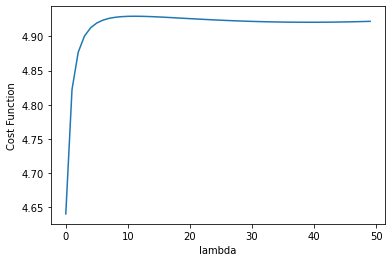

      Feature      Coeff
0        CRIM  -0.110024
1          ZN   0.052861
2       INDUS   0.013636
3        CHAS   2.518300
4         NOX -14.962975
5          RM   3.957452
6         AGE  -0.004496
7         DIS  -1.513273
8         RAD   0.077579
9         TAX  -0.015126
10    PTRATIO  -0.922860
11          B   0.008317
12      LSTAT  -0.559713
13  Intercept  34.254947

--RMSE of Ridge regression
   - Training RMSE:  4.702622079381866
   - Test RMSE:  4.639913391269796

Q) Report the techniques you use
 --> 1. add the incercept term.
 --> 2. Change to squre root for low correlatin feature(CHAS)
 --> 3. TAX RAD are highly correlated. squre of Tax*RAD added
 --> 4. Find the lamdba that gives lowest error rate


In [42]:
print("[Prob 3(f)]")
# add intercept, X0=1
intercept =[]
intercept = [[1] for i in range(feature.shape[0])] 
feature_eng = np.append(feature, intercept, axis=1) #last feature is intercept

# Change to squre root for low correlatin features (CHAS)
feature_eng[:, 3] = np.sqrt(feature_eng[:, 3])

# TAX RAD --> HIghly correlated  
feature_eng[:,8] = np.sqrt(feature_eng[:,8]*feature_eng[:,9].T)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(feature_eng, price, test_size=0.2, random_state=8)

#Select best lambda 
cost_list = []
for lam in range(50):
    # -- Closed-form solver of linear regression
    theta_r = ridge_reg(X_train, y_train, lam)
    features = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','Intercept']
    df_theta_r = pd.DataFrame(zip(features, theta_r),columns=['Feature','Coeff'])

    # ridge regression using top-3 features
    pred_r_test = pred_fn(X_test, df_theta_r)
    rmse_r_test = root_mean_square_error(pred_r_test, y_test)
    cost_list.append(rmse_r_test)
    
plt.plot(list(range(0,50)), cost_list)
plt.xlabel("lambda")
plt.ylabel("Cost Function")
plt.show()

# -- Closed-form solver of linear regression
theta_r = ridge_reg(X_train, y_train, 0)
features = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','Intercept']
df_theta_r = pd.DataFrame(zip(features, theta_r),columns=['Feature','Coeff'])
print(df_theta_r)

# ridge regression using top-3 features
print("\n--RMSE of Ridge regression")
pred_r_train = pred_fn(X_train, df_theta_r)
rmse_r_train = root_mean_square_error(pred_r_train, y_train)
print("   - Training RMSE: ", rmse_r_train)
pred_r_test = pred_fn(X_test, df_theta_r)
rmse_r_test = root_mean_square_error(pred_r_test, y_test)
print("   - Test RMSE: ", rmse_r_test)

print("\nQ) Report the techniques you use")
print(" --> 1. add the incercept term.") 
print(" --> 2. Change to squre root for low correlatin feature(CHAS)")
print(" --> 3. TAX RAD are highly correlated. squre of Tax*RAD added")
print(" --> 4. Find the lamdba that gives lowest error rate")    
      